<a href="https://colab.research.google.com/github/dayanaviana/WGU/blob/main/207-DataExploration_Project/CHURN_3_tests_chi_square_categorical_categorical_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pearson’s Chi-Squared test
## Used to verify relashionship between two categorical groups

H0: NO statistic significant difference between groups

H1: Correlation exists

    
    If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
    If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.
    
    If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
    If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.


# Create subset with categorical data only
## categorical_columns & categorical_df

In [ ]:
categorical_columns = [
                  "Churn",
                 "State",
                 "Area",
                 "Marital",
                 "Gender",
                 "Techie",
                 "InternetService",
                 "Multiple",
                 "OnlineBackup",
                 "DeviceProtection",
                 "StreamingTV",
                 "StreamingMovies",
                 "Port_modem",
                 "Tablet",
                 "OnlineSecurity",
                 "TechSupport",
                 "Contract",
                 "PaperlessBilling",
                 "PaymentMethod",
                 "Item1",
                 "Item2",
                 "Item3"
                 ]
#Select columns
categorical_df = df.loc[:, categorical_columns]

# Cross tabulation and Chi-square Tests




 Churn & Gender

Chi-square: statistic=7.880 p-value=0.019 
Degrees_of_Freedom=2 Critical_Value:5.991 
Reject H0. Features are Dependent! 

Cross tab:
Churn        No   Yes
Gender               
Female     3753  1272
Male       3425  1319
Nonbinary   172    59




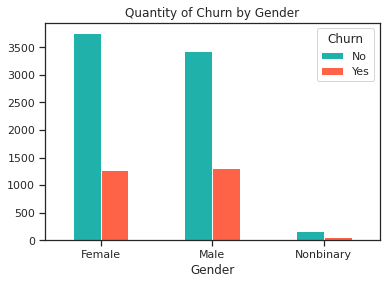




 Churn & Techie

Chi-square: statistic=44.115 p-value=0.000 
Degrees_of_Freedom=1 Critical_Value:3.841 
Reject H0. Features are Dependent! 

Cross tab:
Churn     No   Yes
Techie            
No      6226  2095
Yes     1124   555




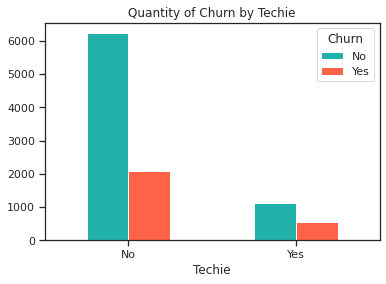




 Churn & InternetService

Chi-square: statistic=87.462 p-value=0.000 
Degrees_of_Freedom=2 Critical_Value:5.991 
Reject H0. Features are Dependent! 

Cross tab:
Churn              No   Yes
InternetService            
DSL              2349  1114
Fiber Optic      3368  1040
None             1633   496




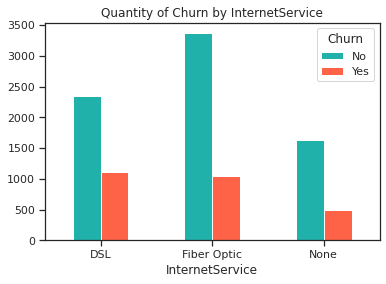




 Churn & Multiple

Chi-square: statistic=173.038 p-value=0.000 
Degrees_of_Freedom=1 Critical_Value:3.841 
Reject H0. Features are Dependent! 

Cross tab:
Churn       No   Yes
Multiple            
No        4253  1139
Yes       3097  1511




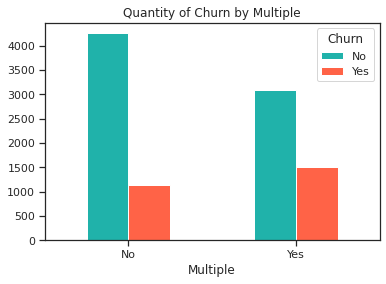




 Churn & OnlineBackup

Chi-square: statistic=25.282 p-value=0.000 
Degrees_of_Freedom=1 Critical_Value:3.841 
Reject H0. Features are Dependent! 

Cross tab:
Churn           No   Yes
OnlineBackup            
No            4149  1345
Yes           3201  1305




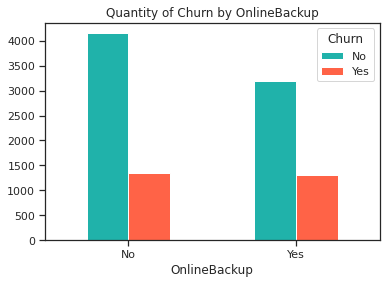




 Churn & DeviceProtection

Chi-square: statistic=31.653 p-value=0.000 
Degrees_of_Freedom=1 Critical_Value:3.841 
Reject H0. Features are Dependent! 

Cross tab:
Churn               No   Yes
DeviceProtection            
No                4250  1364
Yes               3100  1286




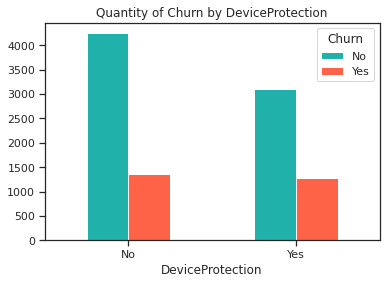




 Churn & StreamingTV

Chi-square: statistic=528.652 p-value=0.000 
Degrees_of_Freedom=1 Critical_Value:3.841 
Reject H0. Features are Dependent! 

Cross tab:
Churn          No   Yes
StreamingTV            
No           4235   836
Yes          3115  1814




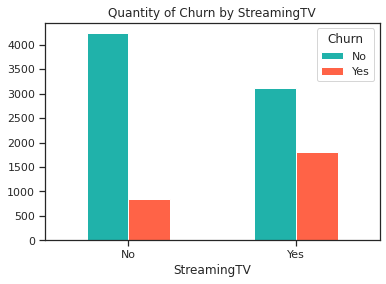




 Churn & StreamingMovies

Chi-square: statistic=835.414 p-value=0.000 
Degrees_of_Freedom=1 Critical_Value:3.841 
Reject H0. Features are Dependent! 

Cross tab:
Churn              No   Yes
StreamingMovies            
No               4394   716
Yes              2956  1934




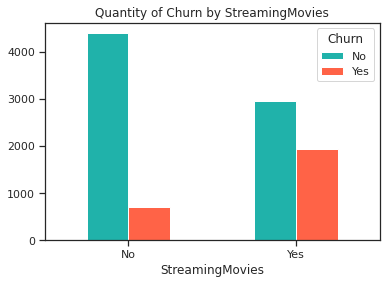










 Churn & Contract

Chi-square: statistic=718.592 p-value=0.000 
Degrees_of_Freedom=2 Critical_Value:5.991 
Reject H0. Features are Dependent! 

Cross tab:
Churn             No   Yes
Contract                  
Month-to-month  3422  2034
One year        1795   307
Two Year        2133   309




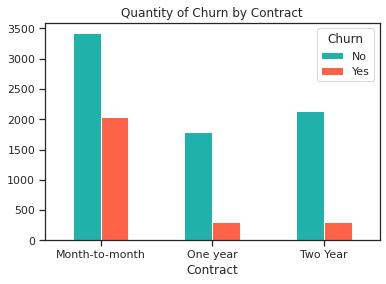






 Churn & PaymentMethod

Chi-square: statistic=9.437 p-value=0.024 
Degrees_of_Freedom=3 Critical_Value:7.815 
Reject H0. Features are Dependent! 

Cross tab:
Churn                       No  Yes
PaymentMethod                      
Bank Transfer(automatic)  1671  558
Credit Card (automatic)   1543  540
Electronic Check          2435  963
Mailed Check              1701  589




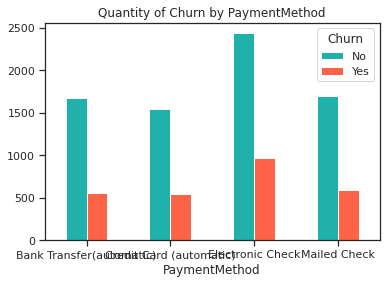

In [20]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# import churn_clean into data frame
docId= "1-WjyGAwXhgkEMSGk1PHKMjIASkVgn-YO"
googleDriveFile = "https://docs.google.com/uc?id="+docId+"&export=download"
df = pd.read_csv(googleDriveFile, index_col=0)

categorical_columns = [
                 "Gender",
                 "Techie",
                 "InternetService",
                 "Multiple",
                 "OnlineBackup",
                 "DeviceProtection",
                 "StreamingTV",
                 "StreamingMovies",
                 "Tablet",
                 "OnlineSecurity",
                 "TechSupport",
                 "Contract",
                 "PaperlessBilling",
                 "PaymentMethod",
                 ]

# Compare every feature with each other
for index, column_name in enumerate(categorical_columns):
    print("\n")
    sub_column_name = "Churn"
    features = sub_column_name + " & " + column_name
          
    # Cross tabulation
    crossTab = pd.crosstab(index=df[column_name], columns=df[sub_column_name])

    #Performing Chi-square test
    # H0: NO statistic significant difference between groups
    # H1: Correlation exists
    statistic, pValue, dof, expected = stats.chi2_contingency(crossTab)

    #Interpret test-statistic
    prob = 0.95
    critical = stats.chi2.ppf(prob, dof)
    # statistic measure distance between observed and expected frequencies
    if abs(statistic) >= critical:
      h1_t_statistics = True
    else:
      h1_t_statistics = False

    #print('interpret p-value')
    alpha = 1.0 - prob
    #P-value is the probability of H0 being true
    if pValue <= alpha: # Accept H1
      h1_p_value = True
    else:
      h1_p_value = False

    if (h1_t_statistics & h1_p_value):
      print("\n",features)

      print('\nChi-square: statistic=%.3f p-value=%.3f \nDegrees_of_Freedom=%d Critical_Value:%.3f ' % ( statistic, pValue, dof, critical))
      print('Reject H0. Features are Dependent! ')

      print('\nCross tab:')
      print(crossTab)
      print('\n')
      
      # Bar Graph
      barGraph = crossTab.plot.bar( 
                          # stacked=True,
                          color=['lightseagreen','tomato'], 
                          figsize=(6,4))

      barGraph.set_title('Quantity of Churn by '+ column_name)
      barGraph.set_xticklabels(crossTab.index, rotation=0)
      plt.show()


# Insigts
Relevant correlations
    
    Multiple & Tablet
    StreamingMovies & Tablet
    Techie & DeviceProtection
    InternetService & TechSupport
    Gender & OnlineBackup

    Churn & Gender
    Churn & PaymentMethod
    Churn & OnlineBackup
    Churn & DeviceProtection
    Churn & Techie
    Churn & InternetService
    Churn & Multiple
    Churn & StreamingTV
    Churn & Contract
    Churn & StreamingMovies

    TechSupport & Item1: Timely response
    Techie & Item8:Evidence of active listening
    State & Item3:Timely replacements

    Item2 & Item3 (Timely fixes & Timely replacements)
    Item1 & Item3 (Timely response & Timely replacements)
    Item1 & Item2 (Timely response & Timely fixes)